# Статистический анализ датасета - Red Wine Quality
Данный датасет представляет из себя набор физико-химических качеств вина и итоговую оценочную переменную 'quality' - качество. 
## Описание Атрибутов:
- fixed acidity - фиксированная кислотность
- volatile acidity - летучая кислотность
- citric acid - лимонная кислота
- residual sugar - остаточный сахар
- chlorides - хлориды
- free sulfur dioxide - свободный диоксид серы
- total sulfur dioxide - общий диоксид серы
- density - плотность
- pH
- sulphates - сульфаты
- alcohol - алкоголь
- quality - качество


In [234]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [235]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [270]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Что из себя представляют данные 
Все переменные целочисленные, пропущенных значений в датасете не наблюдается.

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [238]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Корреляция

Видимой кореляции между данными нет, делая вывод по heatmap.
Можно заметить корреляцию 'свободного диоксида серы' и 'общий диоксид серы' с коэффициентом корреляции 0.6. Что с логической точки зрения имеет логическое объяснение. Подобную ситуацию также можно увидеть атрибутом фиксированной кислотности и лимонной кислоты.
Максимальные коэффициенты корреляции в датасете:
* fixed.acidity - citric.acid (0.672)
* fixed.acidity - density (-0.688)
* fixed.acidity - pH (-0.683)
* citic acid - pH (-0.542)
* volatile.acidity - citric acid (-0.552)
* free sulfur dioxide - total sulfur dioxide (0.667)


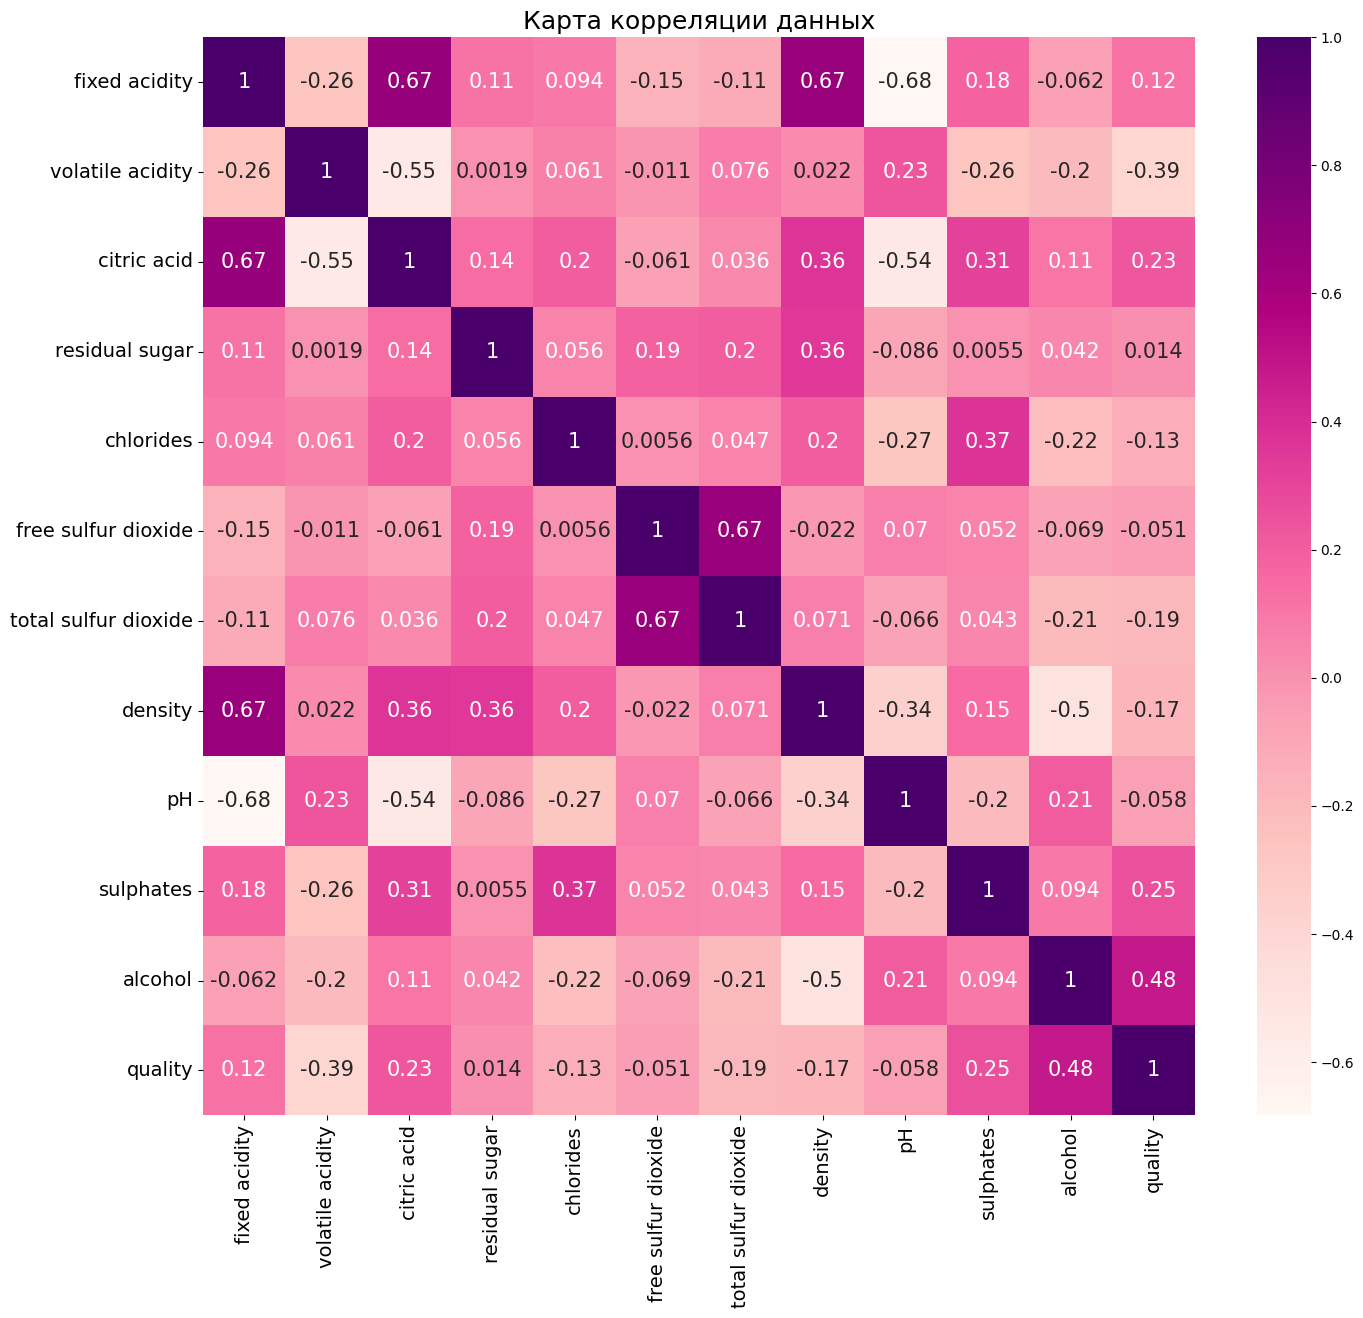

In [239]:
plt.figure(figsize=(16, 14))

dataplot = sns.heatmap(df.corr(), cmap="RdPu", annot=True,annot_kws={'fontsize': 15})

plt.title("Карта корреляции данных", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# Оценка графиков распределения переменных

Построим гистограмы распределения и сверху наложим график нормального распределения, чтобы оценить как распределены наши значения.

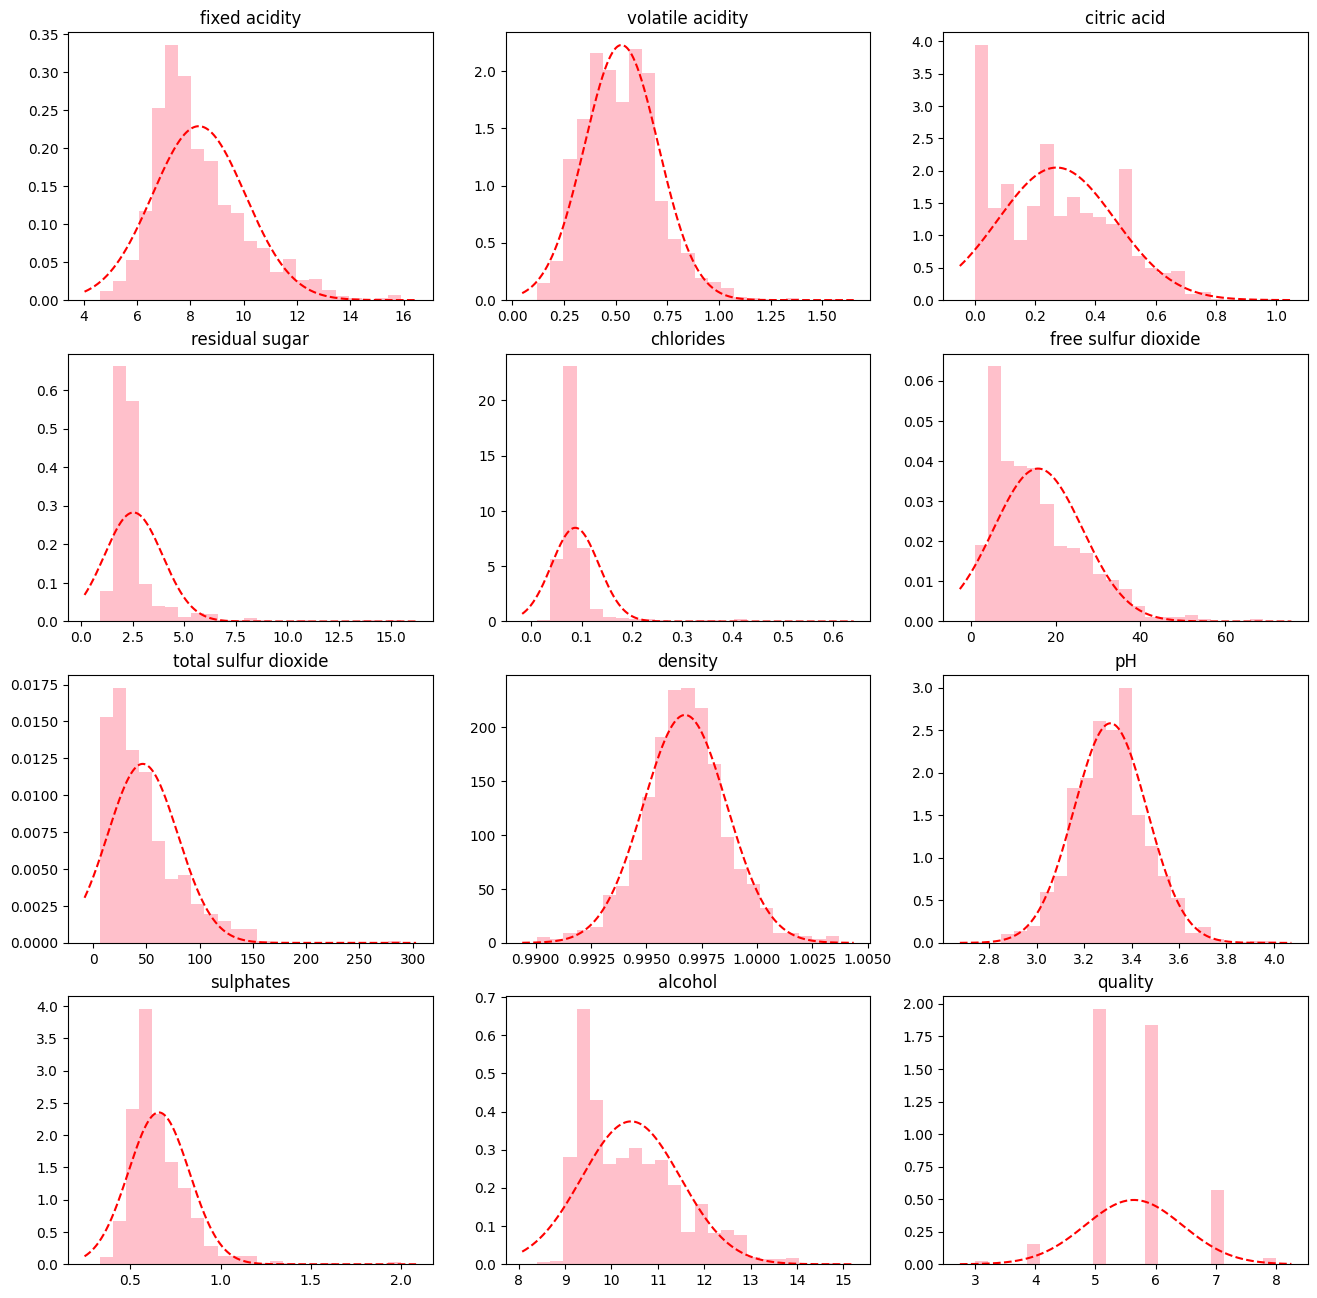

In [240]:
keys = list(df.columns)

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(16, 16))

for i, col in enumerate(df.columns):
    key = col
    row, col = divmod(i, 3)
    axs[row, col].hist(df[key], density=True, bins=23, color='pink')
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = axs[row, col].get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    axs[row, col].plot(x, y, linestyle='dashed', color='r')
    axs[row, col].set_title(key)

plt.show()

## Визуальная оценка кванитили 

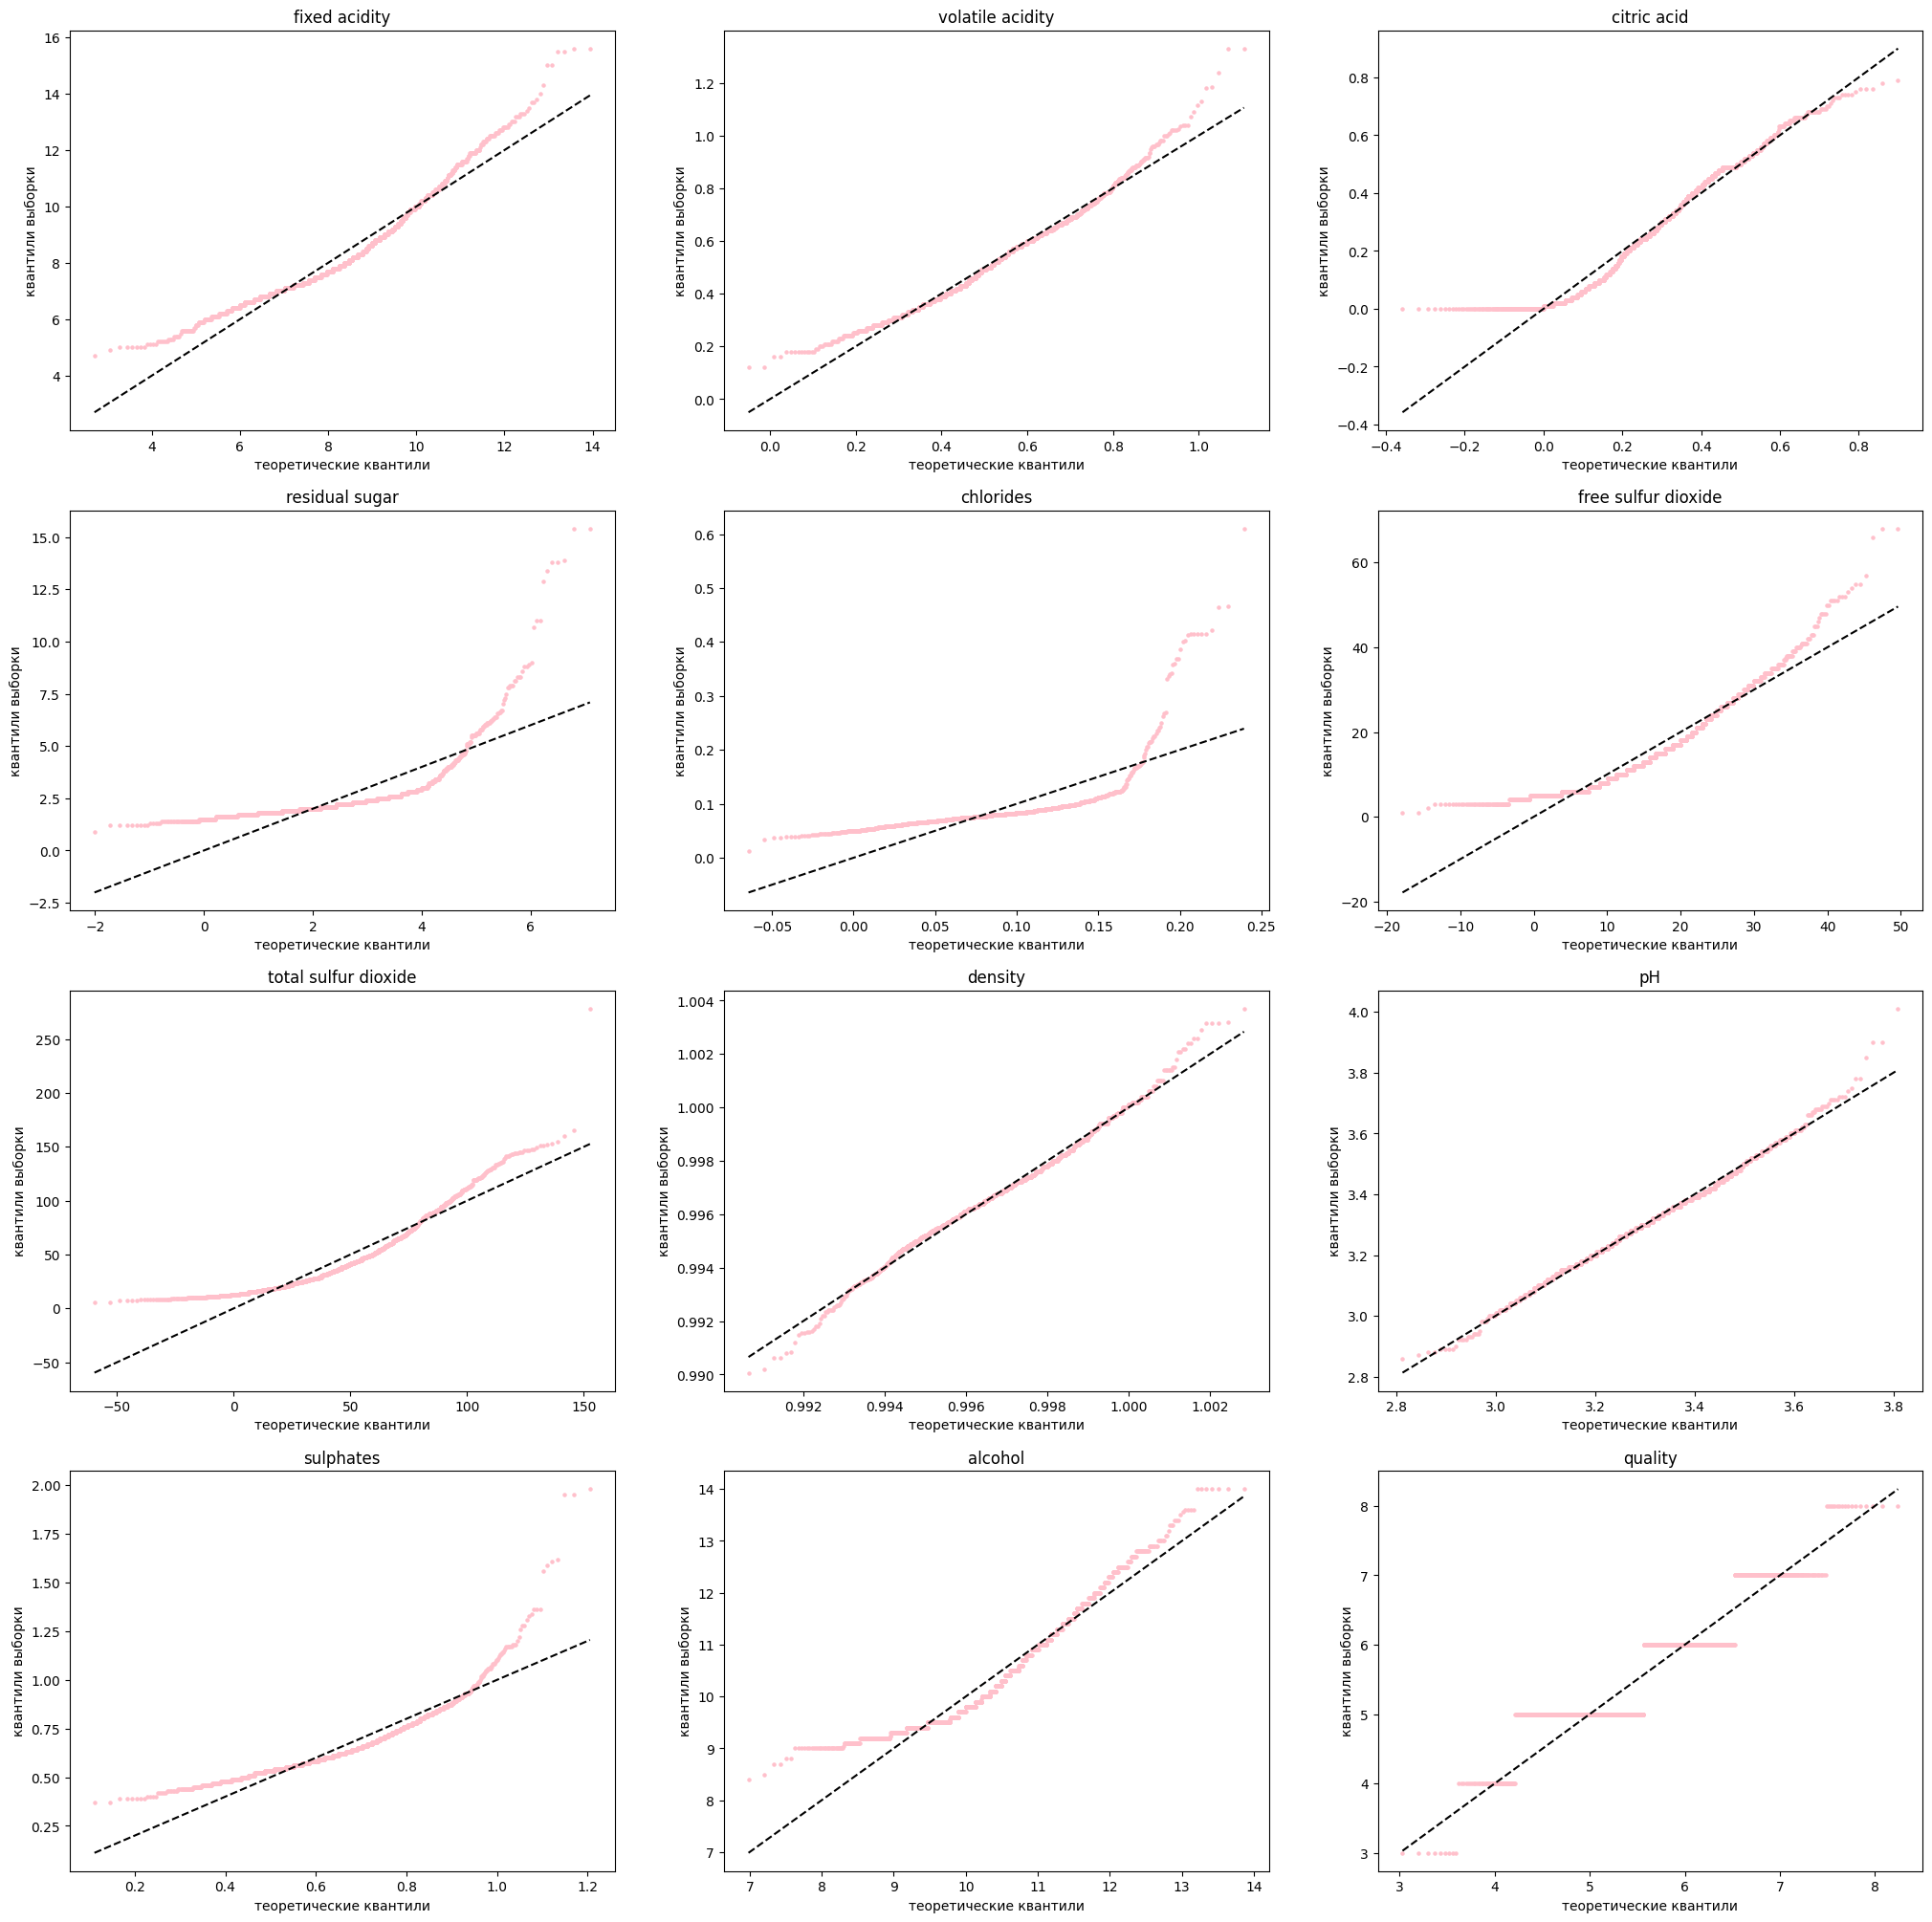

In [241]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(25, 25))


for i, col in enumerate(df.columns):
    key = col
    row, col = divmod(i, 3)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()
    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)
    
    axs[row, col].scatter(x, y, s=5, color='pink')
    axs[row, col].plot(x, x, color='black', linestyle='dashed')
    
    axs[row, col].set_title(key)
    axs[row, col].set_xlabel('теоретические квантили')
    axs[row, col].set_ylabel('квантили выборки')
    

## Выводы о визуальной оценки квантили и гистограмм

Как мы видим многие переменные, визуально оценивая, распределены схоже с нормальным распределением, особенно хорошо это видно у переменной pH и density. Где нет нормального распределения точно так это у атрибута quality. 

## Промежуточные выводы
Исходя из относительно нормального распределения у величин: 'pH', 'density', 'fixed acidity', 'volatile acidity' изучим их более подробно.

## Численная оценка "нормальности"

Сравним численные значения теоретической вероятности попадания в интервал нормального распределения и значения на нашей выборке.
Как мы можем увидеть отклонения на 0.01 на одной из сигм присутствует, но все равно сильно приближенно к нормальному распределению.  

In [242]:
keys = ['pH', 'density', 'fixed acidity', 'volatile acidity']

for key in keys:
    print('<<<--------',key,'-------->>>')
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

<<<-------- pH -------->>>
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7104440275171983
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9530956848030019
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9949968730456535

<<<-------- density -------->>>
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7279549718574109
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.949343339587242
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9887429643527205

<<<-------- fixed acidity -------->>>
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7398373983739838
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9499687304565353
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9924953095684803

<<<-------- volatile acidity -------->>>
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.707942464040025
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9649781113195748
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.99

## Регрессия между фикс. кислотностью и летучей кислотностью, есть ли?

### Рассмотрим величины 'fixed acidity', 'volatile acidity'
Коэффициент корреляции у нас получился отрицательный между этими величинами.
Практически полезных выводов из графика сделать достаточно сложно. Но заметить, что присутствует обратная зависимость можно. Но на графике видно, что чем больше мы уходим в правую часть, тем меньше у нас данных, поэтому это можно связать с небольшим количество данных в выборке.

Количество данных на интервалах(left_value - левая граница постоянной кислотности, right_value - правая граница постоянной кислотности):

* от 6 до 8 - 745
* от 8 до 11 - 603
* от 14 до 16 =  8


In [243]:
np.corrcoef(df['fixed acidity'],df['volatile acidity'])[0][1]

-0.2561308947703821

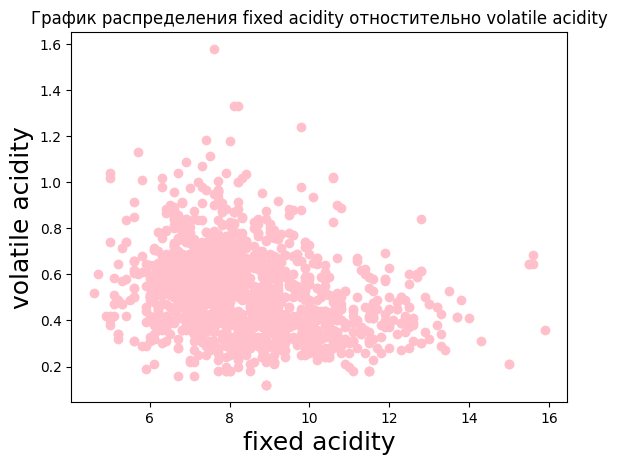

In [244]:
plt.scatter(df['fixed acidity'], df['volatile acidity'], color='pink')
plt.xlabel('fixed acidity', fontsize=18)
plt.ylabel('volatile acidity', fontsize=18)
plt.title('График распределения fixed acidity отностительно volatile acidity')
plt.show()

In [245]:
print('count of interfaval \'6 - 8\' = ', df[(df['fixed acidity'] > 6) & (df['fixed acidity'] < 8)]['fixed acidity'].count())
print('count of interfaval \'8 - 11\' = ', df[(df['fixed acidity'] > 8) & (df['fixed acidity'] < 11)]['fixed acidity'].count())
print('count of interfaval \'14 - 16\' = ', df[(df['fixed acidity'] > 14) & (df['fixed acidity'] < 16)]['fixed acidity'].count())

count of interfaval '6 - 8' =  745
count of interfaval '8 - 11' =  603
count of interfaval '14 - 16' =  8


### Рассчёт регрессии и проверка значимости
Коэффициент регресси показывают, что линейной зависимости скорее всего нет.

In [246]:
ones = np.ones((1599,1))
x_pot = np.hstack((ones, df['fixed acidity'].values.reshape(1599,1)))

XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['volatile acidity'])
z = x_pot.dot(b)
e = df['volatile acidity'] - z

R = 1 - sum_of_squares(e) / sum_of_squares(np.array(df['volatile acidity']))
R ## R-квадрат

0.06560303525587641

## Статический тест

Выдвинем нулевую гипотезу о том, что зависимости нет. Для этого вычислим t - критическое значения F-распределения и F- коэффициент детерминации. Мы получили, что F > t из за чего можем откинуть нулевую гипотезу. И сказать, что зависимость между переменными присутствует. 

In [247]:
n = 1599 # Кол-во атрибутов
m = 1 # Кол-во предикторов

k1 = m 
k2 = n - m - 1

k1, k2 # Степени свободы

(1, 1597)

In [248]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8472882467544105

In [249]:
F = (R / k1) / ((1 - R) / k2)
F

112.12370251258727

## Визуализация зависимости 

Рассчитаем коэффициенты линейной регрессии и построим график распределения данных и уравнение прямой лин регресии.

Коэффициенты регрессии:  [-0.02634129]
Пересечение:  0.746970487148782


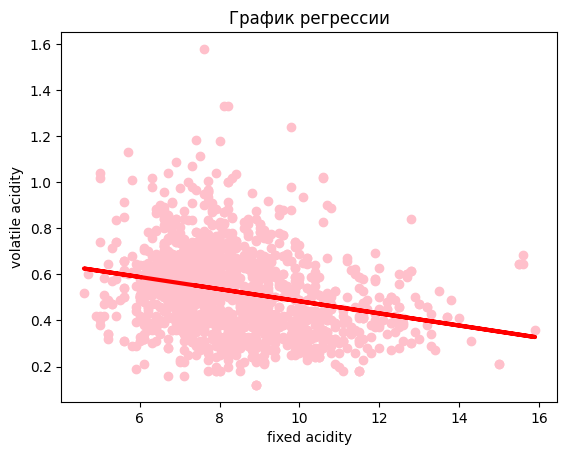

In [250]:
from sklearn.linear_model import LinearRegression

x = np.array(df['fixed acidity']).reshape((-1, 1))
y =  np.array(df['volatile acidity'])

model = LinearRegression()

model.fit(x, y)

coefficients = model.coef_
intercept = model.intercept_
print('Коэффициенты регрессии: ', coefficients)
print('Пересечение: ', intercept)

plt.scatter(x, y, color='pink')
plt.plot(x, model.predict(x), color='r', linewidth=3)
plt.title('График регрессии')
plt.xlabel('fixed acidity')
plt.ylabel('volatile acidity')
plt.show()


## Вывод на тему регрессии между фикс. кислотностью и летучей кислотностью

У нас получилось обратная зависимость, что исходя из логических рассуждений довольно странно. Но изучив вопрос темы красного вина более подрбно в соотвествующих источниках стало известно, что данные значения никак абсолютно не зависят напрямую друг от друга. Данные характеристики оказывают влияние на вкусовые качества вина из чего можно сделать вывод о том, что производители стараются держать данные параметры в подобной пропорции.

### Дополнение к выводу

Рассматривая столбец 'volatile acidity', можно сделать предположение о том, что у вина с оценкой выше, меньше значение 'volatile acidity'. По данной выборке это явно проглядывается. Но так ли на самом деле в жизни далеко не факт. Так как наша выборка довольно мала. 

In [251]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [268]:
df['volatile acidity'].mode()[0], df['volatile acidity'].mean()

(0.6, 0.5289369085173502)

In [253]:
df['volatile acidity'].describe()

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

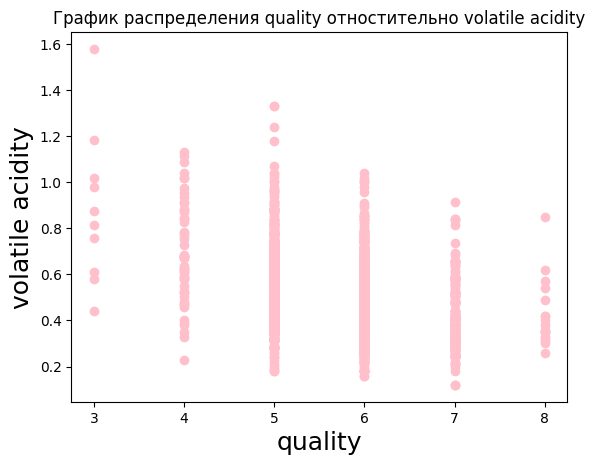

In [254]:
plt.scatter(df['quality'], df['volatile acidity'], color='pink')
plt.xlabel('quality', fontsize=18)
plt.ylabel('volatile acidity', fontsize=18)
plt.title('График распределения quality отностительно volatile acidity')
plt.show()

# Качество вина

## Алкоголь
Рассмотрим распределение переменной алкоголя и изучим наличие выбросов.

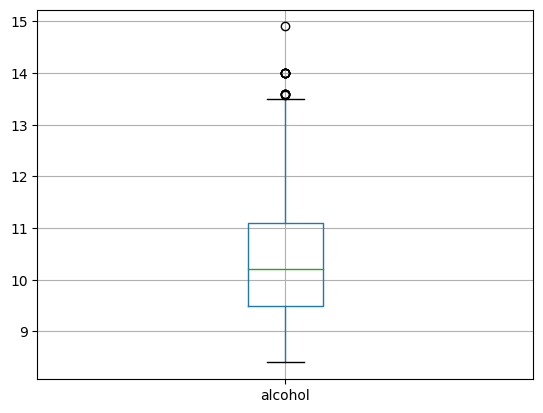

In [255]:
df.boxplot(column=['alcohol'])
plt.show()

### Выбросы 
Изучим, что за выбросы и какие значения они имеют

In [271]:
q1 = df['alcohol'].quantile(0.25)
q3 = df['alcohol'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers = df.loc[(df['alcohol'] < lower_bound) | (df['alcohol'] > upper_bound)]
outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7
1114,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6
1132,7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.99330,3.38,0.88,13.600000,7
1228,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8


Text(0, 0.5, 'quality')

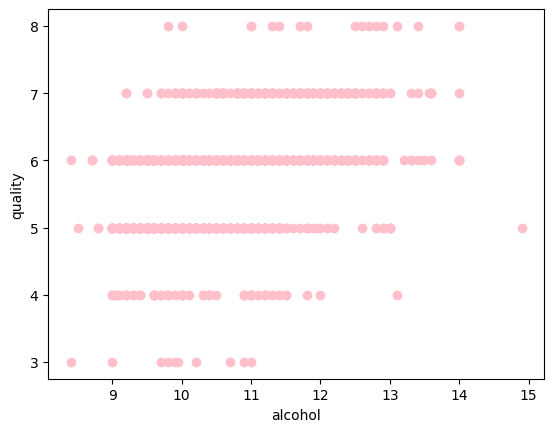

In [257]:
plt.scatter(df['alcohol'], df['quality'], color='pink')
plt.xlabel('alcohol')
plt.ylabel('quality')

### Удалим выбросы
Можно увидеть, что выбросов не так много и они имеют не такое большое отклонение. Но все же уберем их

In [258]:
df = df.loc[(df['alcohol'] > lower_bound) & (df['alcohol'] < upper_bound)]
len(df)

1585

## Чем больше алкоголя тем хуже оценка вина
Примем это за нулевую гипотезу.
Разделим наш датасет на две выборки. Первая выборка будет иметь количество алкоголя ниже среднего значения, вторая выше. 

In [260]:
df['alcohol'].mean(), df['alcohol'].mode()[0]

(10.392418506834911, 9.5)

In [259]:
def var_analise(df, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = df[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1
  sigma2_w = SS_w / k2
  sigma2_b, sigma2_w

  F = sigma2_b / sigma2_w

  alpha = 0.05

  t = stats.f.ppf(1 - alpha, k1, k2)

  return F>t

In [261]:

alco_mean = df['alcohol'].mean()
df1 = df[df['alcohol'] > alco_mean]
df2 = df[df['alcohol'] < alco_mean]
len(df1), len(df2) 

(710, 875)

In [262]:
var_analise(df, df1, df2, 'quality')

True

In [263]:
ans_mean1 = df1['quality'].mean()
ans_mean2 = df2['quality'].mean()
print(f'Средняя оценка \nMean alcohol >: {ans_mean1} \nMean alcohol <: {ans_mean2}')

Средняя оценка 
Mean alcohol >: 5.990140845070423 
Mean alcohol <: 5.333714285714286


### Выводы по поводу оценки и количества алкоголя
По полученным резульатам видно, что количество алкоголя влияет на средную оценку. Если учитывать, что все выбросы, которые были убраны имели оценку 6 и выше. То с учетом их мы бы получили более высокую разницу в средних значениях. Имеет ли данный вывод отношение к реальности? Скорее нет, так как в дешевое вино могут добавлять спирт, и это вряд ли добавит качество. Но на нашей выборке явно есть разница.

## Влияет ли количество сульфатов на оценку

In [264]:
sulph_mean = df['sulphates'].mean()
df1 = df[df['sulphates'] > sulph_mean]
df2 = df[df['sulphates'] < sulph_mean]

var_analise(df, df1, df2, 'quality')

True

In [265]:
ans_mean1 = df1['quality'].mean()
ans_mean2 = df2['quality'].mean()
print(f'Средняя оценка \nMean sulphates >: {ans_mean1} \nMean sulphates <: {ans_mean2}')

Средняя оценка 
Mean sulphates >: 5.958199356913183 
Mean sulphates <: 5.414330218068536


# Выводы 
Проведя статистический анализ нашего датасета, можно сделать выводы о том, что случайные величины 'pH', 'violate acidity', 'density' имеют очень близкое к нормальному распределению. Изучая зависимость между фиксированной кислотностью и летучей, получили то, что у данных пристуствует отрицательная зависимость, которую мы показали. Но пришли к конечному итогу, что данные величины не зависят напрямую друг от друга, а скорее производители стараются держать данные показатели в подобной пропорции. Также из неочевидных на первый взгляд получили результат того, что в среднем у вина с оценкой выше выше такие параметры как алкоголь и сульфаты.    